# Python Day 4

## docstrings and doctest

In [5]:
# Define a function:

def plus(n, m):
    """plus function adds two numbers. Sample usage:
       
    >>> plus(5, 6)
    11
    """
    return n + m

# The docomentation can be seen using help:
help(plus)

Help on function plus in module __main__:

plus(n, m)
    plus function adds two numbers. Sample usage:
       
    >>> plus(5, 6)
    11



In [6]:
# it can be tested using the doctest module

import doctest

doctest.testmod()

TestResults(failed=0, attempted=1)

<span style="color:red">Fix the documentation of plus(n, m) so that the test passes.</span>

doctest can also be used externally to test all the file by calling:
<pre>python -m doctest -v filename.py</pre>
docstrings of functions and of classes are stored in their \__doc__ attribute

In [ ]:
class C:
    """C documentation"""
    pass

print(C().__doc__)

## Decorator wrappers

In [17]:
# Define the following decorator which runs the decorated function twice and returns a tuple:

def duplicated(func):
    def wrapper(*args, **kwargs):
        return (func(*args, **kwargs), func(*args, **kwargs))
    return wrapper

double_id = duplicated(id)

s = '12345'
print(id(s))
print(double_id('12345'))

4450768576
(4450768576, 4450768576)


In [18]:
# Decorating a function can also be done using @

@duplicated
def five():
    """this function returns (5, 5)"""
    return 5

print(five())
help(five.__doc__)

(5, 5)
No Python documentation found for 'this function returns (5, 5)'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [20]:
# Decorators ruin the docstrings:

print(five.__doc__)

this function returns 5


In [21]:
# To save the docstring we can use functools.wraps decorator

from functools import wraps

def duplicated(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        return [func(*args, **kwargs)] * 2
    return wrapper

@duplicated
def five():
    """this function returns (5, 5)"""
    return 5

print(five())
print(five.__doc__)

[5, 5]
this function returns (5, 5)


## Courroutines

In [ ]:
# yield can be used to not only to return values but also to receive them.

def consumer():
    value = yield
    while True:
        print(value)
        value = yield

def producer(consumer):
    next(consumer)
    for i in range(16):
        consumer.send(i)

producer(consumer())

## numpy

In [9]:
# numpy is the advanced math module for python
# to install it run in the shell: pip install numpy

# numpy, together with scipy and matplotlib implement many of Matlab's functionality.
# Matlab users can use the following reference of numpy & scipy:
#  https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

import numpy as np

# Create a vector (1-d numpy array)
a = np.array([0, 1, 2, 3])
print(a * 2)
print(a.shape)

# Create a matrix (2-d numpy array)
b = np.array([a, a])
print(b.shape)

# Create identity matrix
c = np.random.rand(5)
print(c)

[0 2 4 6]
(4,)
(2, 4)
[ 0.36662602  0.89663586  0.81785317  0.36237814  0.35130237]


In [10]:
# matrix can be indexed by rows
a = np.array([[1, 2, 3], [4,5,6]])
a[:2]

array([[1, 2, 3],
       [4, 5, 6]])

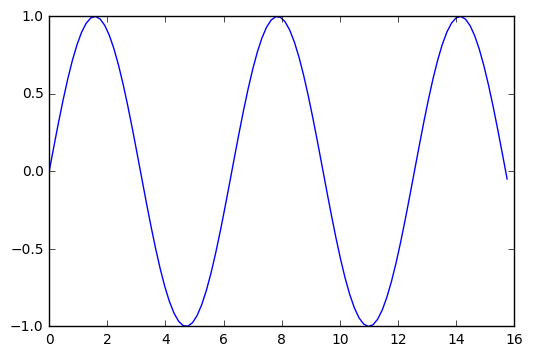

In [11]:
# matplotlib contains plotting functions for numpy arrays

import matplotlib.pyplot as plt

x = np.arange(100) / 2 / np.pi
y = np.sin(x)

plt.plot(x, y)
plt.show()